In [1]:
import os
import math
import pandas as pd
import numpy as np
import sys
from IPython.display import display
import seaborn as sns
#import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

### <font color='red'> Data Exploration and Relative frequency histogram

**Example:** Of great importance to residents of central Florida is the amount of radioactive material present in the soil of reclaimed phosphate mining areas. Measurements of the amount of Uranium-238 in 25 soil samples were as follows 
(measurements in picocuries per gram): [.74,.32, 1.66, 3.59, 4.55,6.47, 1.90, 2.69, .75, 9.99,  1.77, 2.41, 1.96, .70, 2.42, .54, 3.36, .37, 1.09,8.32, 4.06,
 .76, 2.03, 5.70, 12.48]

**First lets put our data here** 

In [4]:
frequencies=[.74,.32, 1.66, 3.59, 4.55,6.47, 1.90, 2.69, .75, 9.99,  1.77, 2.41, 1.96, .70, 2.42, .54, 3.36, .37, 1.09,8.32, 4.06,
 .76, 2.03, 5.70, 12.48]

**Lets print the frequencies**

In [5]:
print(frequencies)

[0.74, 0.32, 1.66, 3.59, 4.55, 6.47, 1.9, 2.69, 0.75, 9.99, 1.77, 2.41, 1.96, 0.7, 2.42, 0.54, 3.36, 0.37, 1.09, 8.32, 4.06, 0.76, 2.03, 5.7, 12.48]


**How many data points we have?**
-length(size) of the data

In [6]:
length_of_frequencies=len(frequencies)
length_of_frequencies

25

**Lets first sort the numbers and explore the data!**

In [7]:
sorted_frequencies=np.sort(frequencies)
sorted_frequencies

array([ 0.32,  0.37,  0.54,  0.7 ,  0.74,  0.75,  0.76,  1.09,  1.66,
        1.77,  1.9 ,  1.96,  2.03,  2.41,  2.42,  2.69,  3.36,  3.59,
        4.06,  4.55,  5.7 ,  6.47,  8.32,  9.99, 12.48])

Here it is easy to see the minimum value and maximum value. \
Since the list has 25 items, the median is the (25+1)/2=13th item in the list

**Min,median,maximum**

In [8]:
minimum=sorted_frequencies[0] #first entry (In python, first index of an array is 0; so index of first item becomes 0) 
maximum=sorted_frequencies[-1] #Here we look at the last entry
median=sorted_frequencies[13-1]#Since the first index is 0, index for the 13th item would be 12
print("minimum value is", minimum)
print("median value is", median)
print("maximum value is", maximum)

minimum value is 0.32
median value is 2.03
maximum value is 12.48


**Lets double check the results.** 

In [9]:
np.min(frequencies), np.median(frequencies), np.max(frequencies)

(0.32, 2.03, 12.48)

**Mean(average)**

Mean is the sum of points divided by number of points in the list. Lets calculate it!

In [10]:
sum_of_frequencies=np.sum(frequencies)
sum_of_frequencies

80.63000000000001

In [11]:
mean=sum_of_frequencies/ length_of_frequencies
mean

3.2252000000000005

Lets double check!

In [32]:
np.mean(frequencies)

3.2252000000000005

### Histogram

In [12]:
sorted_frequencies

array([ 0.32,  0.37,  0.54,  0.7 ,  0.74,  0.75,  0.76,  1.09,  1.66,
        1.77,  1.9 ,  1.96,  2.03,  2.41,  2.42,  2.69,  3.36,  3.59,
        4.06,  4.55,  5.7 ,  6.47,  8.32,  9.99, 12.48])

Frequencies are between 0 and 12. We can put them into groups. Here we may form groups in the different way. I will follow the following approach. Lets get 13 bins of equal width. Then width=(maximum -minimum)/13

In [63]:
Bin_width=(maximum-minimum)/13
Bin_width

0.9353846153846154

In [67]:
Group1=[x for x in sorted_frequencies if minimum<=x < minimum+Bin_width]
print(Group1)
print("Frequency of Group 1 is", len(Group1))
print("Relative frequency of Group 1 is", len(Group1)/ len(frequencies))

[0.32, 0.37, 0.54, 0.7, 0.74, 0.75, 0.76, 1.09]
Frequency of Group 1 is 8
Relative frequency of Group 1 is 0.32


In [68]:
Group2=[x for x in sorted_frequencies if minimum+Bin_width<=x<minimum+2*Bin_width]
print(Group2)
print("Frequency of Group 2 is", len(Group2))
print("Relative frequency of Group 2 is", len(Group2)/ len(frequencies))

[1.66, 1.77, 1.9, 1.96, 2.03]
Frequency of Group 2 is 5
Relative frequency of Group 2 is 0.2


In [93]:
Group13=[x for x in sorted_frequencies if minimum+12*Bin_width<=x<=minimum+13*Bin_width]
print(Group13)
print("Frequency of Group 13 is", len(Group13))
print("Relative frequency of Group 13 is", len(Group13)/ len(frequencies))

[12.48]
Frequency of Group 13 is 1
Relative frequency of Group 13 is 0.04


**Frequency histogram**

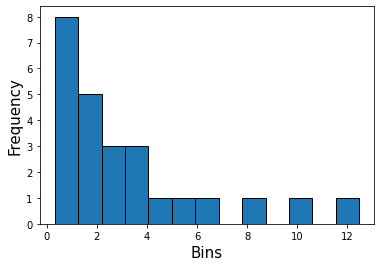

In [88]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(frequencies, edgecolor='black',bins=13)
ax.set_xlabel('Bins', size=15)
ax.set_ylabel('Frequency', size=15)
plt.show()

**Relative frequency histogram**

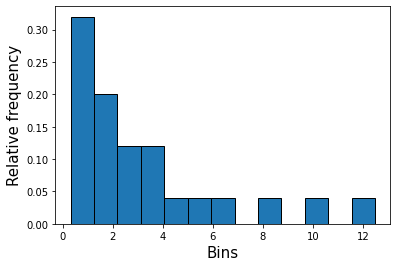

In [90]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(frequencies, edgecolor='black',bins=13,weights=np.ones_like(frequencies) / len(frequencies))
ax.set_xlabel('Bins', size=15)
ax.set_ylabel('Relative frequency', size=15)
plt.show()


#### Mean and Variance

**Example: Are some cities more windy than others? Does Chicago deserve to be nicknamed “The Windy City”? Given below are the average wind speeds (in miles per hour) for 45 selected U.S. cities:
[8.9, 12.4, 7.1, 11.8, 9.1, 10.9, 8.8, 12.7,10.2, 10.3,8.6, 11.3, 9.2, 10.7, 7.6, 9.1, 10.3, 9.6, 7.8,8.4, 7.8, 5.7, 7.7, 10.6, 8.3,
8.8, 35.1,9.2, 8.2, 11.5, 9.3, 10.5,10.5,8.8, 9.5,6.2, 7.0, 9.0, 8.7, 7.9, 8.8, 9.6, 8.9, 8.8, 9.4]

In [134]:
speeds=[8.9, 12.4, 7.1, 11.8, 9.1, 10.9, 8.8, 12.7,10.2, 10.3,8.6, 11.3, 9.2, 10.7, 7.6, 9.1, 10.3, 9.6, 7.8,8.4, 7.8, 5.7, 7.7, 10.6, 8.3, 8.8, 35.1,9.2, 8.2, 11.5, 9.3, 10.5,10.5,8.8, 9.5,6.2, 7.0, 9.0, 8.7, 7.9, 8.8, 9.6, 8.9, 8.8, 9.4]

In [135]:
len(speeds)

45

In [136]:
Mean_speeds=np.sum(speeds)/ len(speeds)
Mean_speeds

9.791111111111112

In [137]:
np.mean(speeds)

9.791111111111112

Remember the standard deviation formula
$\sqrt{\frac{\sum_{i=1}^{45}(x_i- \overline{x})^2}{N}}$ where x1, x2,.. are points in the data, $\overline{x}$ is the mean, and N is the
size(length) of data.

 $\overline{x}=9.79$ and $N=45.$

Lets do it step by step!\
**Step1:** Lets first find the points $[(x_1- \overline{x})^2,(x_2- \overline{x})^2,..., (x_{45}- \overline{x})^2 ]$

In [138]:
Squared_distances_from_mean=[(x- Mean_speeds)**2 for x in speeds] 
print(Squared_distances_from_mean)

[0.7940790123456803, 6.806301234567897, 7.242079012345687, 4.035634567901233, 0.4776345679012366, 1.2296345679012328, 0.982301234567902, 8.461634567901225, 0.16719012345678866, 0.25896790123456753, 1.4187456790123492, 2.2767456790123446, 0.34941234567901447, 0.8260790123456757, 4.800967901234574, 0.4776345679012366, 0.25896790123456753, 0.03652345679012401, 3.9645234567901286, 1.935190123456792, 3.9645234567901286, 16.7371901234568, 4.37274567901235, 0.6543012345678989, 2.2234123456790136, 0.982301234567902, 640.5398567901234, 0.34941234567901447, 2.53163456790124, 2.9203012345678974, 0.2411901234567905, 0.5025234567901219, 0.5025234567901219, 0.982301234567902, 0.08474567901234632, 12.896079012345686, 7.790301234567908, 0.6258567901234585, 1.1905234567901275, 3.576301234567904, 0.982301234567902, 0.03652345679012401, 0.7940790123456803, 0.982301234567902, 0.1529679012345685]


**Step2:** Find the sum of the squared distances. 
$\sum_{i=1}^{45}(x_i- \overline{x})^2$


In [139]:
Sum=np.sum(Squared_distances_from_mean)
Sum

753.4164444444446

**Step2:** Divide it by number of elements
$\frac{\sum_{i=1}^{45}(x_i- \overline{x})^2}{45}$

In [140]:
Average_Sum=Sum/45
Average_Sum

16.74258765432099

**Step3:** Take the square root. 
$\sqrt{\frac{\sum_{i=1}^{45}(x_i- \overline{x})^2}{45}}$ 


In [132]:
Standard_deviation=np.sqrt(Average_Sum)
Standard_deviation

4.091770723576896

- Lets double check!

In [133]:
np.std(speeds)

4.091770723576896